In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import configparser
sys.path.insert(0, 'Utils/')

from AISDataManager import AISDataManager
import SimpleUtils as sU
import Constants as c
import TimeUtils as timeUtils

aISDM = AISDataManager()

In [4]:
mMSITypeFile = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/MMSIListType_15_16_17_18_19_20.csv"
mMSITypeDF,_ = aISDM.load_data_from_csv(mMSITypeFile)
print(mMSITypeDF.shape)
print(mMSITypeDF.head)
totalVessels = mMSITypeDF.shape[0]

(7415, 2)
<bound method NDFrame.head of            MMSI  VesselType
0             1         0.0
1     338031982         0.0
2     338069687         0.0
3     355596000         0.0
4     365903144         0.0
5     366053000         0.0
6     367087370         0.0
7     367197000         0.0
8     367300280         0.0
9     211002010         0.0
10    368004240         0.0
11    218069000         0.0
12    368785000         0.0
13    503641900         0.0
14    368849000         0.0
15    376324000         0.0
16    101010101        22.0
17    368078070        30.0
18    368152530        30.0
19    367179710        30.0
20    367166820        30.0
21    367151530        30.0
22    366920620        30.0
23    366813420        30.0
24    366804620        30.0
25    366773410        30.0
26    366384000        30.0
27    369501000        30.0
28    338392023        30.0
29    338368323        30.0
...         ...         ...
7385  972608764         NaN
7386  972608808         NaN
7387  98

In [5]:
#remove vessels which has type as NaN
mMSITypeDF = mMSITypeDF.dropna()
print(mMSITypeDF.shape)
vesselWithType = mMSITypeDF.shape[0]
print("Vessels with type information = %d"%vesselWithType)

(6396, 2)
Vessels with type information = 6396


In [6]:
uniqueTypes = mMSITypeDF['VesselType'].unique()
totalNumTypes = uniqueTypes.shape[0]
print("There are total %d types of vessel"%totalNumTypes)

There are total 55 types of vessel


In [7]:
#get count for all the vessel types
vesselTypeOccurences = mMSITypeDF['VesselType'].value_counts(ascending=True)
print(vesselTypeOccurences.shape)
print(vesselTypeOccurences)

(55,)
83.0         1
22.0         1
1015.0       1
81.0         1
1008.0       1
40.0         1
42.0         1
38.0         1
91.0         1
69.0         1
73.0         2
54.0         2
99.0         2
77.0         2
1014.0       2
53.0         2
82.0         2
32.0         2
55.0         3
34.0         3
84.0         3
1016.0       3
1003.0       3
39.0         3
33.0         3
74.0         4
72.0         5
51.0         5
52.0         7
1022.0       7
89.0         9
35.0        10
1013.0      11
1011.0      13
0.0         16
31.0        17
1005.0      22
79.0        24
60.0        27
1010.0      29
1020.0      32
71.0        38
90.0        50
30.0        61
80.0        85
1025.0     134
1018.0     144
1012.0     171
1001.0     215
36.0       243
70.0       271
37.0       433
1024.0     696
1019.0    1480
1004.0    2090
Name: VesselType, dtype: int64


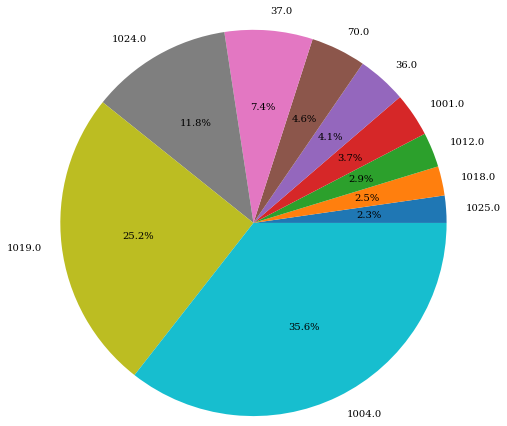

In [8]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.pie(vesselTypeOccurences.iloc[-10:].get_values() \
        ,labels=vesselTypeOccurences.iloc[-10:].index \
        ,radius=2 \
        ,autopct='%1.1f%%')
plt.savefig('TypePie.png')
plt.savefig('TypePie.eps')